In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings("ignore")




# Exploratory Data Analysis - EDA

In [3]:
df = pd.read_csv("credit_data_risk.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
for col in list(df):
    print(col)

Age
Sex
Job
Housing
Saving accounts
Checking account
Credit amount
Duration
Purpose
Risk


In [7]:
for col in list(df):
    print(col)
    print(df[col].unique())
    

Age
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Sex
['male' 'female']
Job
[2 1 3 0]
Housing
['own' 'free' 'rent']
Saving accounts
[nan 'little' 'quite rich' 'rich' 'moderate']
Checking account
['little' 'moderate' nan 'rich']
Credit amount
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6

In [8]:
missing_values=pd.DataFrame({'Missing Values':df.isnull().sum(),'Missing % Values':(df.isnull().sum()/1000)*100})
missing_values

,Missing Values,Missing % Values
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0
Risk,0,0.0


In [9]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
df.shape

(1000, 10)

In [10]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])
df.isnull().sum()

# Since we had a small data set its better to fill the data with its mean rather than removing the rows or columns which can result in biased results and predictions.

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [11]:
missing_values=pd.DataFrame({'Missing Values':df.isnull().sum(),'Missing % Values':(df.isnull().sum()/1000)*100})
missing_values

,Missing Values,Missing % Values
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,0,0.0
Checking account,0,0.0
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0
Risk,0,0.0


In [12]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [13]:
df = df.rename(columns={"Credit amount": "Credit_amount","Saving accounts":"Saving_accounts","Checking account":"Checking_account"})

In [14]:
df

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   1000 non-null   object
 5   Checking_account  1000 non-null   object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


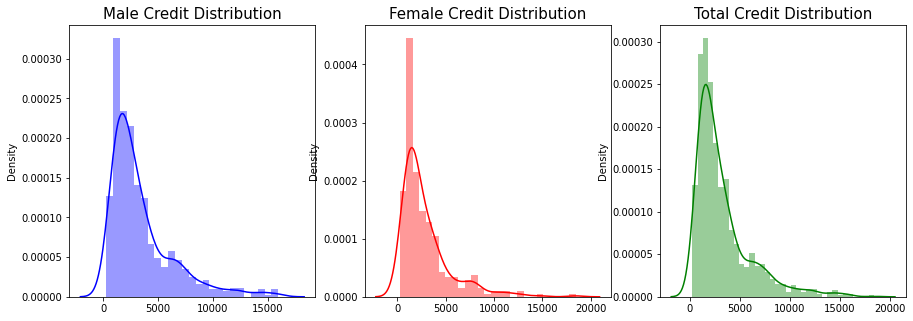

In [16]:
male_credit = df["Credit_amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit_amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.distplot(male_credit, ax=ax[0], color="blue")
ax[0].set_title("Male Credit Distribution", fontsize=15)
sns.distplot(female_credit, ax=ax[1], color="red")
ax[1].set_title("Female Credit Distribution", fontsize=15)
sns.distplot(total_credit, ax=ax[2], color="green")
ax[2].set_title("Total Credit Distribution", fontsize=15)
plt.show()

We can see that the data is positively skewed

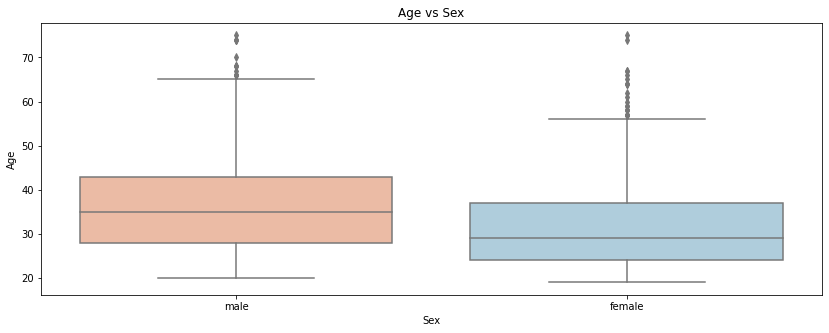

In [18]:
plt.figure(figsize=(14,5))
gx=sns.boxplot(x='Sex', y='Age', data=df, palette="RdBu")
gx.set_title("Age vs Sex")
gx.set_ylabel("Age")
gx.set_xlabel("Sex")
plt.show()


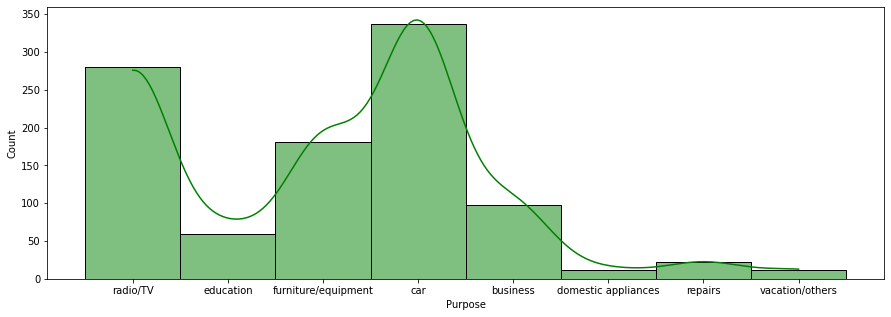

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Purpose", kde=True, color="g")


The above plot shows shows the purpose of loan that people took.

<AxesSubplot:xlabel='Housing', ylabel='Count'>

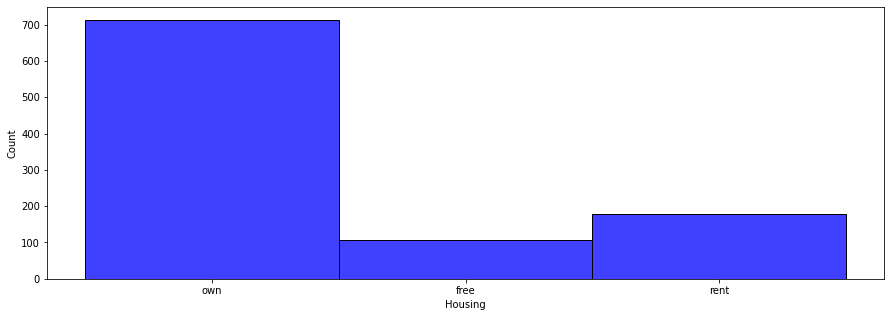

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Housing", color="b")


Above plot shows how many people own the house, on rent or free. 

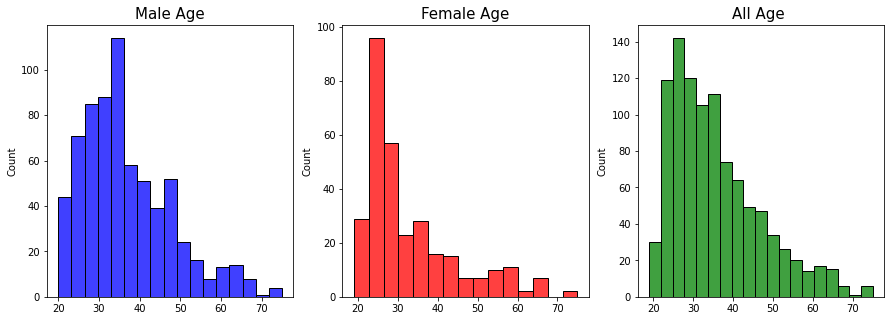

In [20]:
male_age = df["Age"].loc[df["Sex"] == "male"].values
female_age = df["Age"].loc[df["Sex"] == "female"].values
All_age = df['Age'].values
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(male_age,ax=ax[0],color="blue")
ax[0].set_title("Male Age", fontsize=15)
sns.histplot(female_age, ax=ax[1], color="red")
ax[1].set_title("Female Age", fontsize=15)
sns.histplot(All_age, ax=ax[2], color="green")
ax[2].set_title("All Age ", fontsize=15)
plt.show()
# This plot shows what kind of people(men or female) have taken loan the most with respect to their age.

In [ ]:
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex'])
display(sex_purpose)


Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


Above frame Shows the purpose of having credits for each gender

In [21]:
number_of_jobs = pd.crosstab(df["Job"], df["Sex"])
number_of_jobs
#This Frame Shows the No of Jobs for each gender

Sex,female,male
Job,,
0,12,10
1,64,136
2,197,433
3,37,111


In [22]:
#dividing Age groups into different categories
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
df

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,little,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,little,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good,Young Adults
996,40,male,3,own,little,little,3857,30,car,good,Young Adults
997,38,male,2,own,little,little,804,12,radio/TV,good,Young Adults
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Young


# Now we are finding the co-relation between variables

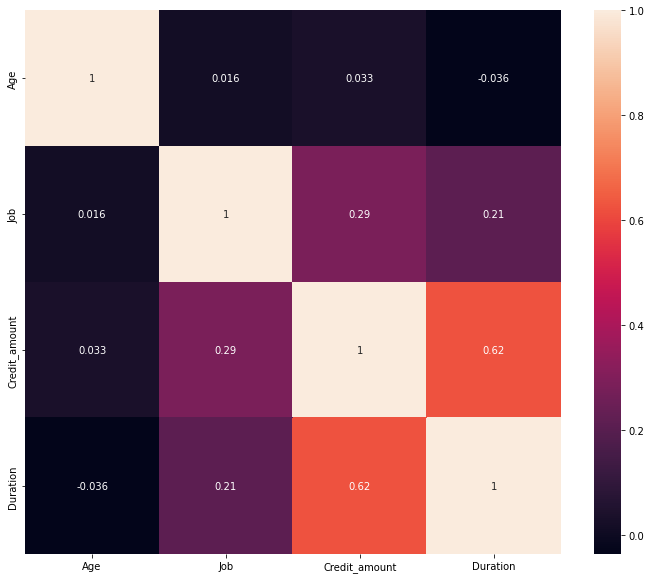

In [23]:

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [24]:
df["Risk"].unique()

array(['good', 'bad'], dtype=object)

In [25]:
df.replace(['good','bad'],[1,0],inplace=True)

In [26]:
pd.to_numeric(df["Risk"],errors='coerce')

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

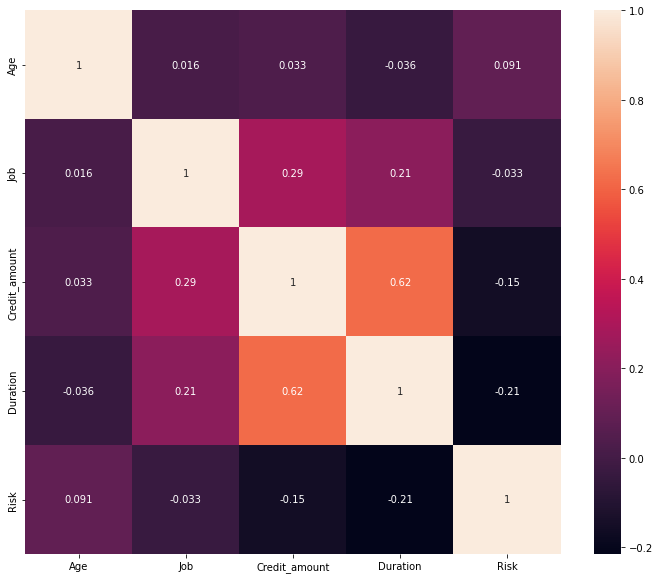

In [27]:

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

Between the Credit Amount and Duration characteristics, there is a strong positive relationship. The length will grow in proportion to the credit value.
There is a negative association between the objective variable (Risk) and the credit amount and duration, which suggests that people with larger credit loans are more at risk, and people with lengthier loan durations are more likely to have unfavorable risks.
The feature purpose is unrelated to the target variable (Risk).

# Finding Assess accuracy, F1 Score and Precision recall

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [29]:
df_clean=df.copy()

In [30]:
cat_features = ['Sex','Housing', 'Saving_accounts', 'Checking_account','Purpose']
num_features=['Age', 'Job', 'Credit_amount', 'Duration','Risk']
for variable in cat_features:
    dummies = pd.get_dummies(df_clean[cat_features])
    df1= pd.concat([df_clean[num_features], dummies],axis=1)
Risk= df1['Risk']          
df2=df1.drop(['Risk'],axis=1)

## Input data Split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(df2,Risk,test_size=0.20,random_state = 30)

In [32]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
from yellowbrick.features import FeatureImportances



def visualize(model):

    
    fig, axes = plt.subplots(1, 3,figsize=(15,5))
    fig.subplots_adjust(wspace=0.7)
    
    visualgrid = [
        #FeatureImportances(model,ax=axes[0][0]),
        ROCAUC(model, ax=axes[1],cmap='coolwarm'),
        ConfusionMatrix(model,cmap='PuOr', ax=axes[2]),
        ClassificationReport(model, cmap='PuRd',ax=axes[0])
        
    ]

    for viz in visualgrid:
        viz.fit(X_train, Y_train)
        viz.score(X_test, Y_test)
        viz.finalize()

    plt.show()

In [60]:

model = LogisticRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# 1st Machine Learning Algorithm: Decision Tree Algorithm

In [61]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [62]:
clf=DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

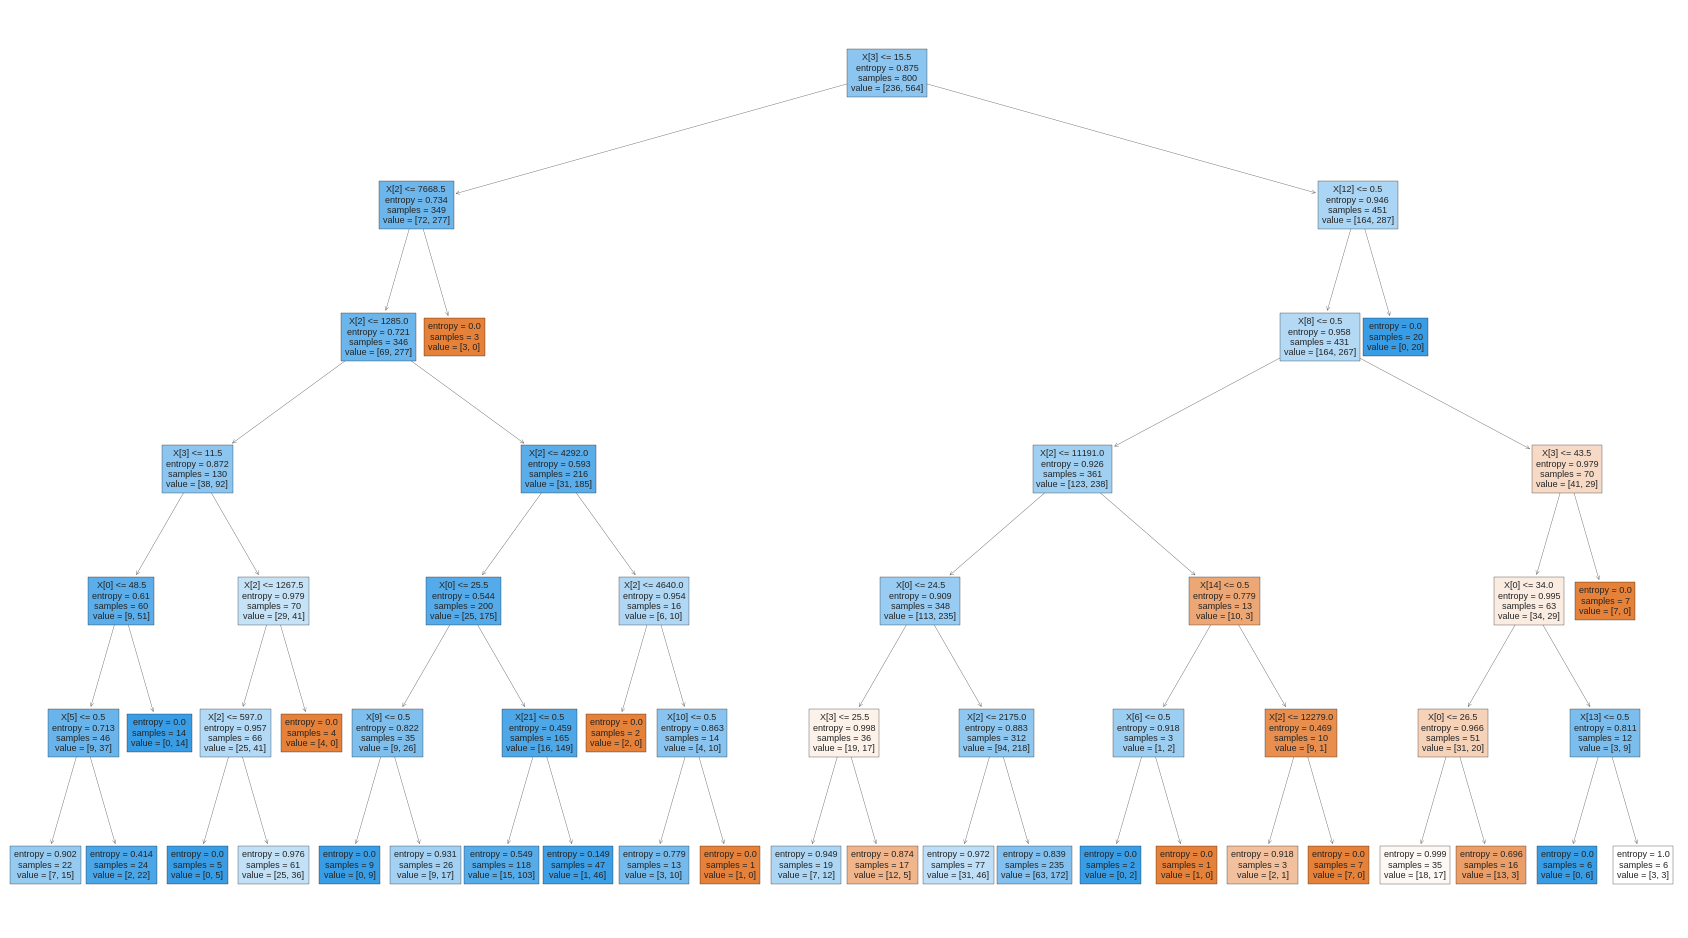

In [63]:
plt.figure(figsize=(30,17))
plot_tree(clf,fontsize=9,filled=True)
plt.show()

In [64]:
prediction_test=clf.predict(X_test) 

In [65]:
prediction_test

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [66]:
confusion_matrix(prediction_test,Y_test)

array([[ 11,  12],
       [ 53, 124]])

In [67]:
print ("\n Classification report : \n",classification_report(Y_test,prediction_test))
print ("Accuracy Score   : ",accuracy_score(Y_test,prediction_test))
model_roc_auc = roc_auc_score(Y_test,prediction_test) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.48      0.17      0.25        64
           1       0.70      0.91      0.79       136

    accuracy                           0.68       200
   macro avg       0.59      0.54      0.52       200
weighted avg       0.63      0.68      0.62       200

Accuracy Score   :  0.675
Area under curve :  0.5418198529411764


Text(0.5, 28.5, 'Predicted label')

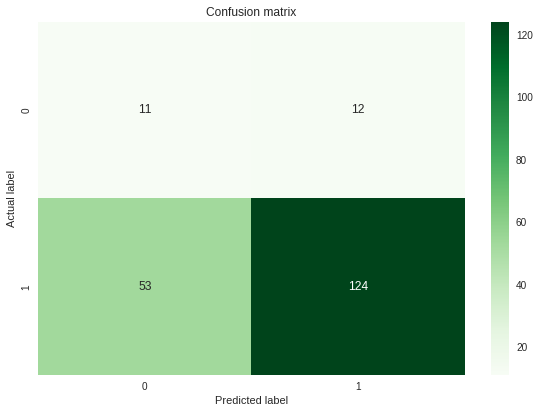

In [68]:
conf_matrix = confusion_matrix(prediction_test,Y_test)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="Greens" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Area under curve :  0.5418198529411764


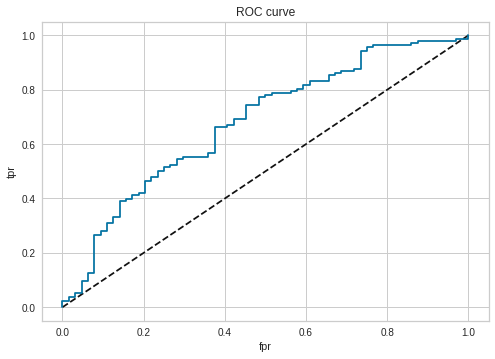

In [69]:
model_roc_auc = roc_auc_score(Y_test,prediction_test) 
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

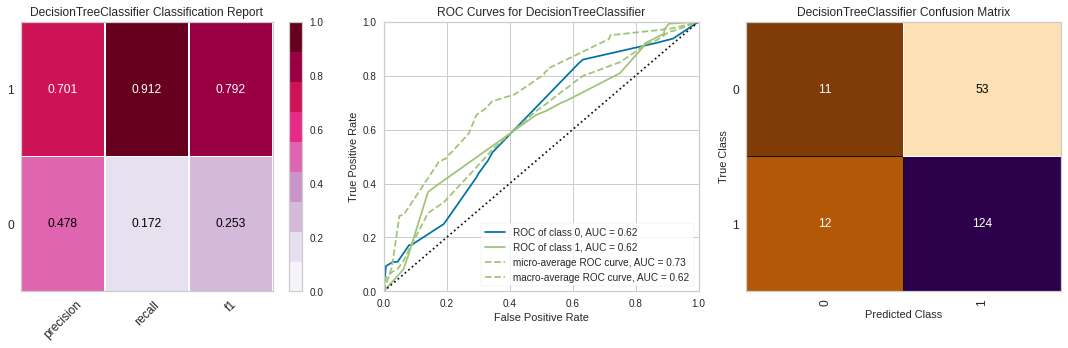

In [70]:
visualize(clf)

#2nd Machine Learning Model: Random Forest

In [71]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [72]:

#Model Training
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train);

#Prediction
predictions_rfc = model_rfc.predict(X_test)
probabilities = model_rfc.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(Y_test,probabilities[:,1])

In [73]:
print ("\n Classification report : \n",classification_report(Y_test,predictions_rfc))
print ("Accuracy Score   : ",accuracy_score(Y_test,predictions_rfc))
model_roc_auc = roc_auc_score(Y_test,predictions_rfc) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.63      0.27      0.37        64
           1       0.73      0.93      0.82       136

    accuracy                           0.71       200
   macro avg       0.68      0.60      0.59       200
weighted avg       0.70      0.71      0.67       200

Accuracy Score   :  0.715
Area under curve :  0.5960477941176471


Text(0.5, 28.5, 'Predicted label')

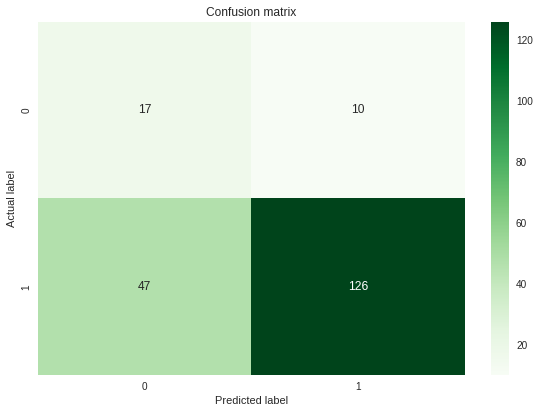

In [74]:
conf_matrix = confusion_matrix(predictions_rfc,Y_test)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="Greens" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Area under curve :  0.5960477941176471


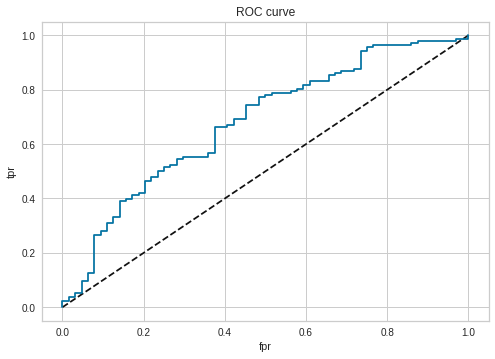

In [75]:
model_roc_auc = roc_auc_score(Y_test,predictions_rfc) 
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

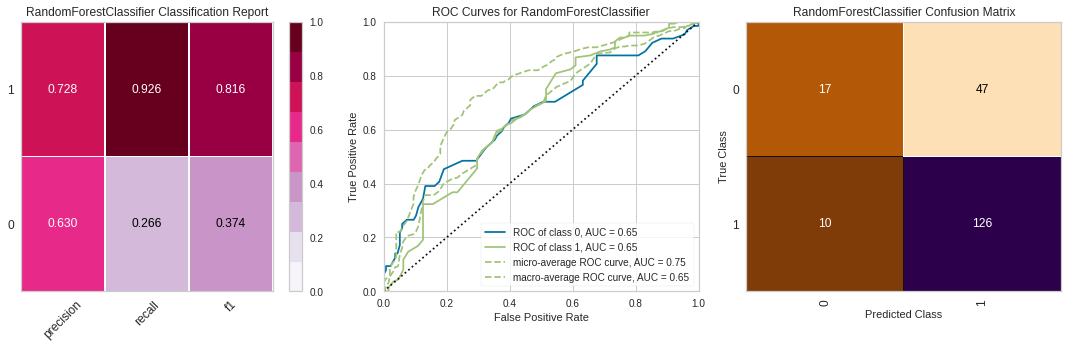

In [76]:
visualize(model_rfc)

# Conclusion

* The Above Analysis Shows all the Classification Report, ROC Curves and Confusion Matrix of all the Algorithms used which include;

1. Decision Trees
2. Random Forest


* We have got different accuracy scores in the above models, which shows a successful modelling tests.
